# PyTorch Assignment: Multi-Layer Perceptron (MLP)

**[Duke Community Standard](http://integrity.duke.edu/standard.html): By typing your name below, you are certifying that you have adhered to the Duke Community Standard in completing this assignment.**

Name: Abhinav Tembulkar

Same result.

### Assignment

Build a 2-layer MLP for MNIST digit classfication. Feel free to play around with the model architecture and see how the training time/performance changes, but to begin, try the following:

Image (784 dimensions) ->  
fully connected layer (500 hidden units) -> nonlinearity (ReLU) ->  
fully connected (10 hidden units) -> softmax

Try building the model both with basic PyTorch operations, and then again with more object-oriented higher-level APIs. 
You should get similar results!


*Some hints*:
- Even as we add additional layers, we still only require a single optimizer to learn the parameters.
Just make sure to pass all parameters to it!
- As you'll calculate in the Short Answer, this MLP model has many more parameters than the logisitic regression example, which makes it more challenging to learn.
To get the best performance, you may want to play with the learning rate and increase the number of training epochs.
- Be careful using `torch.nn.CrossEntropyLoss()`. 
If you look at the [PyTorch documentation](https://pytorch.org/docs/stable/nn.html#crossentropyloss): you'll see that `torch.nn.CrossEntropyLoss()` combines the softmax operation with the cross-entropy.
This means you need to pass in the logits (predictions pre-softmax) to this loss.
Computing the softmax separately and feeding the result into `torch.nn.CrossEntropyLoss()` will significantly degrade your model's performance!

In [2]:
import torch
import torch.nn.functional as F
from tqdm.notebook import tqdm
from torch.nn import CrossEntropyLoss
from torchvision import datasets, transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import sys
train = datasets.MNIST(root='./datasets', train=True, transform=transforms.ToTensor(), download=True)
test = datasets.MNIST(root='./datasets', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(train, batch_size=100, shuffle=False)
trainiter = iter(train_loader)

class NeuralNetwork(nn.Module):

	def __init__(self):
		super().__init__()
		self.layer1 = nn.Linear(784, 784)
		self.relu = torch.nn.ReLU()
		self.layer2 = nn.Linear(784, 10)

	def forward(self, x):
		x = self.layer1(x)
		x = self.relu(x)
		x = self.layer2(x)
		return x
example_data, test = next(trainiter)
example_data = example_data.view(-1, 28*28)
model = NeuralNetwork()
optimizer = torch.optim.SGD(params=model.parameters(), lr=.005)
criterion = nn.CrossEntropyLoss()

col = []

for epoch in range(5):
	print(f'Epoch: {epoch+1}')
	for loop, (train, label) in enumerate(tqdm(train_loader)):
		train = train.view(-1, 28 * 28)
		optimizer.zero_grad()

		y = model(train)
		loss = criterion(y, label)
		loss.backward()
		col.append(loss)
		optimizer.step()



Epoch: 1


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 2


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 3


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 4


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 5


  0%|          | 0/600 [00:00<?, ?it/s]

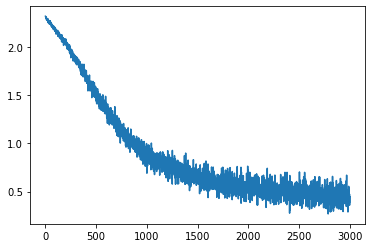

In [3]:
y = list(map(lambda x: x.detach().numpy(), col))
x = torch.linspace(0, len(y), len(y))

plt.plot(x, y)

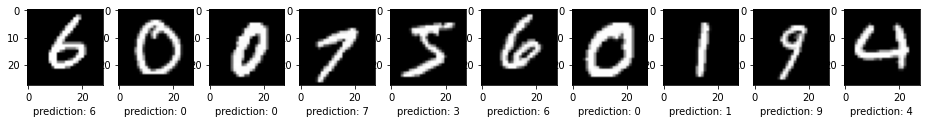

In [4]:
test_iter = iter(test_loader)

val, label = next(test_iter)

perm = torch.randperm(val.shape[0])

val = torch.index_select(val, 0, perm[:10]) 
label = torch.index_select(label, 0, perm[:10]) 
label = label[:10]

val = torch.squeeze(val, dim=1)
fig, ax = plt.subplots(nrows=1, ncols=10)
fig.set_size_inches(16, 12)

for i, matrix in enumerate(val):
	ax[i].imshow(matrix, cmap='gray')
	
	x = matrix.view(-1, 28*28)
	y = model(x)

	y = torch.argmax(y, dim=1)

	ax[i].set_xlabel(f'prediction: {y[0]}')

TypeError: Invalid shape (784,) for image data

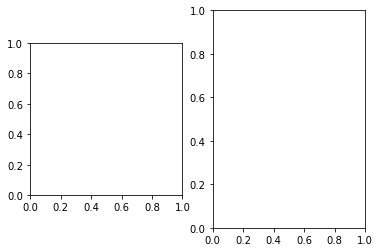

In [20]:
layers = [model.state_dict()['layer1.weight'][0], model.state_dict()['layer1.weight'][1]]
map(lambda x: x.view(28, 28), layers)

layers[0].shape

fig, ax = plt.subplots(nrows=1, ncols=2)

#for i, img in enumerate(layers):
	#ax[i].imshow(img, cmap='gray')